<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_27_Connect_4_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset- Training

In [3]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/train_set_label.csv")
train_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,b,b,x,x,o,x,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,loss
1,b,b,b,b,b,b,o,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,loss
2,x,x,o,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
3,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,o,x,b,b,win
4,x,x,o,o,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b,b,b,b,b,b,b,win


In [ ]:
train_data[train_data['class'] =='loss']

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,b,b,x,x,o,x,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,loss
1,b,b,b,b,b,b,o,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,loss
8,o,x,b,b,b,b,x,o,x,b,b,b,x,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,loss
9,b,b,b,b,b,b,x,x,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,x,x,o,b,b,b,loss
18,b,b,b,b,b,b,o,b,b,b,b,b,x,o,b,b,b,b,x,o,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,x,x,b,b,b,b,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50649,b,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,o,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,x,x,b,b,b,b,loss
50651,b,b,b,b,b,b,o,x,o,b,b,b,x,b,b,b,b,b,b,b,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,x,x,b,b,b,b,loss
50655,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,loss
50656,b,b,b,b,b,b,x,o,b,b,b,b,x,o,o,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,loss


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

## Loading Dataset- Testing

In [4]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/connect-4/test_set_label.csv')
test_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,b,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,x,o,b,b,b,b,x,x,o,b,b,b
1,b,b,b,b,b,b,x,o,o,o,x,b,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b
2,x,x,o,b,b,b,x,o,b,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b
3,b,b,b,b,b,b,x,o,o,b,b,b,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b
4,x,o,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,x,o,b,b,b


## Visualization of Target

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

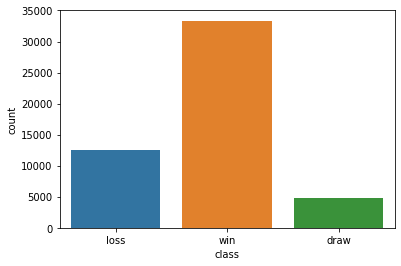

In [6]:
sns.countplot(x='class',data=train_data)

## Check missing values

In [7]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [8]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

## Label Encoding for Target Variables

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['class'] = le.fit_transform(train_data['class'])

In [6]:
train_data.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6,class
0,b,b,b,b,b,b,o,o,x,b,b,b,x,x,o,x,b,b,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,1
1,b,b,b,b,b,b,o,b,b,b,b,b,x,o,o,b,b,b,x,b,b,b,b,b,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,1
2,x,x,o,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,2
3,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,o,x,o,x,b,b,2
4,x,x,o,o,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,b,b,b,b,b,b,b,b,b,2


## Classes

In [11]:
le.classes_

array(['draw', 'loss', 'win'], dtype=object)

## Auto Sklearn

In [ ]:
# To measure execution time of code
!pip install ipython-autotime
 
%load_ext autotime

time: 192 µs (started: 2021-03-14 15:13:45 +00:00)


In [ ]:
# Autosklearn pre-requisite
!apt-get install swig -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (843 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [ ]:
# Autosklearn pre-requisite
!pip install Cython numpy

time: 2.02 s (started: 2021-03-14 15:14:07 +00:00)


In [ ]:
# Automated library for machine learning model selection
!pip install auto-sklearn

     |████████████████████████████████| 6.1MB 6.5MB/s 
     |████████████████████████████████| 22.3MB 1.2MB/s 
     |████████████████████████████████| 675kB 57.1MB/s 
     |████████████████████████████████| 952kB 69.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0MB 51.7MB/s 
     |████████████████████████████████| 266kB 54.0MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879734 sha256=590bcf4197b365376d1b5469346831fb596bf96e8ed7117fec5919a1a2298e98
  Stored in directory: /root/.cache/pip/wheels/39/ea/40/d93931850f700427db0a84180829c709d30484c9475040c7bd
Successfully built ConfigSpace
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.3-cp37-none-any.whl size=6366553 sha256=53aa8bad81522fb806e9e03bcbff2480dc811136e23d9902f0ad6acac365b540
  Stored in directory: /root/.cache/pip/wheels/4d/ad/ed/04937

time: 1min 8s (started: 2021-03-14 15:14:23 +00:00)


In [ ]:
# Autosklearn pre-requisite
!pip install scikit-learn==0.24.1

In [ ]:
# Autosklearn pre-requisite
!python -m pip install "dask[distributed]" --upgrade

     |████████████████████████████████| 931kB 8.4MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [ ]:
import sklearn
import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split

In [ ]:
# Check for class balance between different crops
train_data['class'].value_counts(normalize=True)

win     0.658298
loss    0.246235
draw    0.095466
Name: class, dtype: float64

#### **Dataset is imbalanced**

## Separating Input Features and Output Features

In [ ]:
# Input/independent variables
X = train_data.drop('class', axis = 1) # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['class'] # Output/Dependent variable

## Label Enconding Features

In [ ]:
X.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6',
       'g1', 'g2', 'g3', 'g4', 'g5', 'g6'],
      dtype='object')

In [ ]:
for col in X.columns:
  print(f'{col} unique values : {X[col].unique()}')

a1 unique values : ['b' 'x' 'o']
a2 unique values : ['b' 'x' 'o']
a3 unique values : ['b' 'o' 'x']
a4 unique values : ['b' 'o' 'x']
a5 unique values : ['b' 'o' 'x']
a6 unique values : ['b' 'o' 'x']
b1 unique values : ['o' 'b' 'x']
b2 unique values : ['o' 'b' 'x']
b3 unique values : ['x' 'b' 'o']
b4 unique values : ['b' 'o' 'x']
b5 unique values : ['b' 'o' 'x']
b6 unique values : ['b' 'x' 'o']
c1 unique values : ['x' 'b' 'o']
c2 unique values : ['x' 'o' 'b']
c3 unique values : ['o' 'b' 'x']
c4 unique values : ['x' 'b' 'o']
c5 unique values : ['b' 'x' 'o']
c6 unique values : ['b' 'o' 'x']
d1 unique values : ['b' 'x' 'o']
d2 unique values : ['b' 'x' 'o']
d3 unique values : ['b' 'x' 'o']
d4 unique values : ['b' 'o' 'x']
d5 unique values : ['b' 'x' 'o']
d6 unique values : ['b' 'o' 'x']
e1 unique values : ['o' 'x' 'b']
e2 unique values : ['b' 'x' 'o']
e3 unique values : ['b' 'o' 'x']
e4 unique values : ['b' 'o' 'x']
e5 unique values : ['b' 'o' 'x']
e6 unique values : ['b' 'o' 'x']
f1 unique 

In [ ]:
feature_dict = {'b' :0,'o':1,'x':2}
feature_dict

{'b': 0, 'o': 1, 'x': 2}

In [ ]:
for col in X.columns :
  X[col] = X[col].map(feature_dict)

In [ ]:
test = test_data.copy()
for col in test.columns :
  test[col] = test[col].map(feature_dict)

In [ ]:
X.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0,0,0,0,0,0,1,1,2,0,0,0,2,2,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,0,2,0,0,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,1,2,0,0
4,2,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0


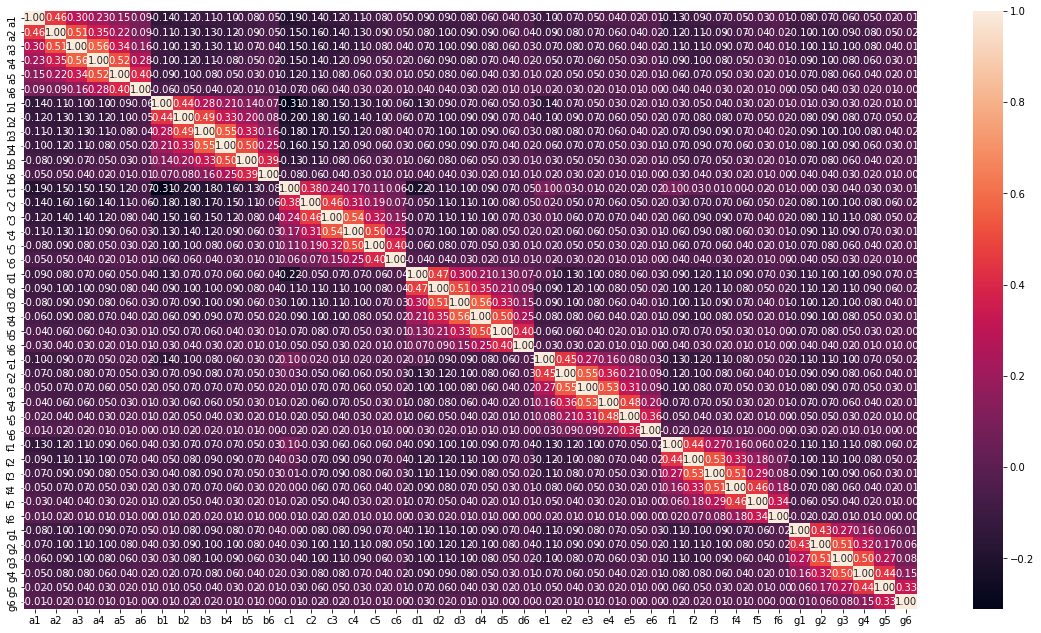

In [ ]:
plt.figure(figsize=(20,11))
sns.heatmap(X.corr(),annot=True,fmt=".2f")

In [ ]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
test.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,2,2,1,0,0,0
1,0,0,0,0,0,0,2,1,1,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0
2,2,2,1,0,0,0,2,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,2,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0
4,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0


## Splitting the data into Train and Validation Set

In [ ]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42,stratify=y)

## Model Building

In [ ]:
automlclassifier = classifier.AutoSklearnClassifier() # Default duration is 3600 seconds (1 hour)
automlclassifier.fit(X_train, y_train)

[WARNING] [2021-03-14 15:56:18,896:Client-AutoML(1):cf212292-84dd-11eb-81cc-0242ac1c0002] Unknown dtype for X: int64, assuming it takes 8 bit/number


AutoSklearnClassifier(per_run_time_limit=360)

In [ ]:
# Print the final ensemble constructed by auto-sklearn
print(automlclassifier.show_models())

[(0.780000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:adaboost:algorithm': 'SAMME.R', 'classifier:adaboost:learning_rate': 0.7308439917916129, 'classifier:adaboost:max_depth': 3, 'classifier:adaboost:n_estimators': 391, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.776251192305813, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.0393189717004651, 'feature_preprocessor:liblinear_svc_preprocessor:C': 3.6815763953680074, 'feature_preprocessor:liblinear_svc_preproces

In [ ]:

print(automlclassifier.sprint_statistics())

auto-sklearn results:
  Dataset name: cf212292-84dd-11eb-81cc-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.839542
  Number of target algorithm runs: 67
  Number of successful target algorithm runs: 56
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 6



## Model Evaluation

In [ ]:
# import accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score,f1_score
# Generate predictions on the validation data
pred = automlclassifier.predict(X_val)
#Accuracy score
print('Accuracy  Score is: ', accuracy_score(y_val, pred))
# F1 Score 
print('Weighted F1 Score is: ', f1_score(y_val, pred, average='weighted'))


Accuracy  Score is:  0.8400105256233142
Weighted F1 Score is:  0.8252416810955532


## Make Predictions on the Test Dataset

In [ ]:
# Make predictions
target = automlclassifier.predict(test)

In [ ]:
target

array(['loss', 'win', 'win', ..., 'win', 'win', 'win'], dtype=object)

## Convert the encoded predictions back to their respective names 

In [ ]:
# Transform the numerical predictions to crop names
target = le.inverse_transform(target)

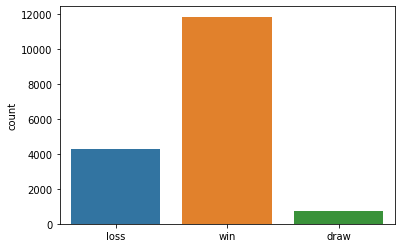

In [ ]:
sns.countplot(target)

## Save prediction results locally via colab notebook

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission_autosklearn.csv', index = False)
files.download('submission_autosklearn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Auto sklearn submission scores : 82.81686545043029.**

## Random Forest Classifier


In [ ]:
train_data['class'].value_counts(normalize=True)

win     0.658298
loss    0.246235
draw    0.095466
Name: class, dtype: float64

In [ ]:
le.classes_

array(['draw', 'loss', 'win'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a1      50667 non-null  int64
 1   a2      50667 non-null  int64
 2   a3      50667 non-null  int64
 3   a4      50667 non-null  int64
 4   a5      50667 non-null  int64
 5   a6      50667 non-null  int64
 6   b1      50667 non-null  int64
 7   b2      50667 non-null  int64
 8   b3      50667 non-null  int64
 9   b4      50667 non-null  int64
 10  b5      50667 non-null  int64
 11  b6      50667 non-null  int64
 12  c1      50667 non-null  int64
 13  c2      50667 non-null  int64
 14  c3      50667 non-null  int64
 15  c4      50667 non-null  int64
 16  c5      50667 non-null  int64
 17  c6      50667 non-null  int64
 18  d1      50667 non-null  int64
 19  d2      50667 non-null  int64
 20  d3      50667 non-null  int64
 21  d4      50667 non-null  int64
 22  d5      50667 non-null  int64
 23  d6      506

In [ ]:
y

0        1
1        1
2        2
3        2
4        2
        ..
50662    2
50663    2
50664    1
50665    2
50666    2
Name: class, Length: 50667, dtype: int64

In [ ]:
gridParams = {
    'max_depth': [2,4,6,8],
    'n_estimators': [100,200,500,1500,2000],
    'random_state' : [42,100,500,720],
    'class_weight':[{0:2,1:1,2:0.5},{0:3,1:2,2:1}]
    }
grid = GridSearchCV(rf, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
{'class_weight': {0: 3, 1: 2, 2: 1}, 'max_depth': 8, 'n_estimators': 1500, 'random_state': 720}
0.7418043611831596


## Kfold Cross Validation 

Running 1 iteration
0.7422235798806184
0.7444182456192842
Running 2 iteration
0.7460486355751361
0.7446552261018421
Running 3 iteration
0.738672456588799
0.7453864729622461
Running 4 iteration
0.7407611507903274
0.7473405308367548
Running 5 iteration
0.7444701482807653
0.7403341007761329
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.738672456588799 0.7473405308367548 0.7434310547411906


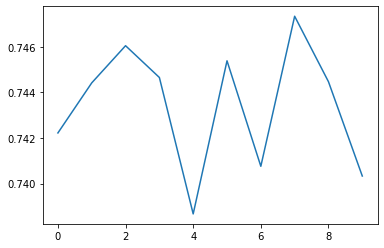

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
import seaborn as sns
iterations = 5
scores = []
scores_val = []
target = y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = RandomForestClassifier( n_estimators =1500, max_depth=12,class_weight={0: 3, 1: 2, 2: 1},random_state = 720)    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


In [ ]:
target = grid.best_estimator_.predict(test)

In [ ]:
target

array([1, 1, 2, ..., 2, 2, 2])

In [ ]:
target = le.inverse_transform(target)
target

array(['loss', 'loss', 'win', ..., 'win', 'win', 'win'], dtype=object)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission_rf.csv', index = False)
files.download('submission_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Random Forest Classifier Scores : 70.28414272469011**

## CatBosst Classifier

In [10]:
!pip install catboost

     |████████████████████████████████| 65.7MB 79kB/s 


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

In [7]:
X = train_data.drop("class",axis=1)
Y = train_data['class']

In [8]:
cat_cols = X.columns

In [11]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

In [14]:
model = CatBoostClassifier(max_depth=12,
                                   random_state=60,
                                   eval_metric='TotalF1',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)
model.fit(X,Y,cat_features = cat_cols)

In [15]:
pred = model.predict(test_data)

In [16]:
target = le.inverse_transform(pred)

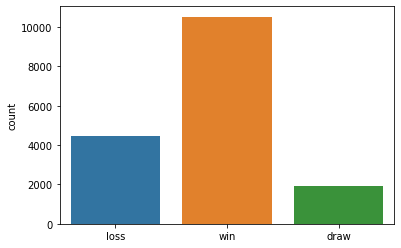

In [17]:
import seaborn as sns
sns.countplot(target)

In [18]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission_cat.csv', index = False)
files.download('submission_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Submission Scores :83.31573563114158. improved with increasing the max depth to 12**

In [ ]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0001,0.005, 0.01],
    'n_estimators': [500,1000,1500,2000]
    }
catboost = CatBoostClassifier()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 158.2min


KeyboardInterrupt: ignored

In [12]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostClassifier(max_depth=10,
                                   random_state=60,
                                   eval_metric='TotalF1',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1000,verbose=0)  

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


Running 1 iteration
0.8126531341855616
0.8075070105833232
Running 2 iteration
0.8131962308737384
0.8152744729762308
Running 3 iteration
0.8128857516227429
0.815091616190451
Running 4 iteration
0.8140698102753278
0.812477990999771
Running 5 iteration
0.8151112285140172
-----------KFOLD--------------


NameError: ignored

In [ ]:
lgb = LGBMClassifier(learning_rate = 0.005, max_depth=4,n_estimators=2000,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = lgb

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


In [ ]:
xgb = XGBClassifier(max_depth = 3,n_estimators=100,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = xgb

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds,average='weighted'))
        scores.append(f1_score(ytest,preds,average='weighted'))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))


## TPOT Classifier

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 6.9MB/s 
     |████████████████████████████████| 157.5MB 32kB/s 
     |████████████████████████████████| 163kB 68.8MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=6b949420053677212795255f0e745bb8900f660f33a7ae5e8eb6f8d81a9ed019
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50667 entries, 0 to 50666
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      50667 non-null  object
 1   a2      50667 non-null  object
 2   a3      50667 non-null  object
 3   a4      50667 non-null  object
 4   a5      50667 non-null  object
 5   a6      50667 non-null  object
 6   b1      50667 non-null  object
 7   b2      50667 non-null  object
 8   b3      50667 non-null  object
 9   b4      50667 non-null  object
 10  b5      50667 non-null  object
 11  b6      50667 non-null  object
 12  c1      50667 non-null  object
 13  c2      50667 non-null  object
 14  c3      50667 non-null  object
 15  c4      50667 non-null  object
 16  c5      50667 non-null  object
 17  c6      50667 non-null  object
 18  d1      50667 non-null  object
 19  d2      50667 non-null  object
 20  d3      50667 non-null  object
 21  d4      50667 non-null  object
 22  d5      50667 non-null

In [ ]:
feature_dict = {'b' :0,'o':1,'x':2}
feature_dict

{'b': 0, 'o': 1, 'x': 2}

In [ ]:
# Input/independent variables
X = train_data.drop('class', axis = 1) # here we are dropping the class feature as this is the target and 'X' is input features, the changes are not
# made inplace as we have not used 'inplace = True'

y = train_data['class'] # Output/Dependent variable

In [ ]:
for col in X.columns :
  X[col] = X[col].map(feature_dict)

In [ ]:
test = test_data.copy()
for col in test.columns :
  test[col] = test[col].map(feature_dict)

In [ ]:
X.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6,c1,c2,c3,c4,c5,c6,d1,d2,d3,d4,d5,d6,e1,e2,e3,e4,e5,e6,f1,f2,f3,f4,f5,f6,g1,g2,g3,g4,g5,g6
0,0,0,0,0,0,0,1,1,2,0,0,0,2,2,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,2,1,1,0,0,0,2,0,0,0,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,1,2,0,0
4,2,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    1
1    1
2    2
3    2
4    2
Name: class, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled =sc.fit_transform(X)

In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X_scaled,y.values,test_size=0.2,stratify=y,random_state=42)

In [ ]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

In [ ]:
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='f1_macro',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.5283129177434834

Generation 2 - Current best internal CV score: 0.5391319724178638

Generation 3 - Current best internal CV score: 0.5645621203681214

Generation 4 - Current best internal CV score: 0.5645621203681214

Generation 5 - Current best internal CV score: 0.5645621203681214

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=9, p=1, weights=uniform)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=True, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='f1_macro', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [ ]:
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print(f'{idx}. {transform}')


Best pipeline steps:
1. KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')


In [ ]:
y_pred = tpot.predict(x_test)

In [ ]:
f1_score(y_test,y_pred,average='macro')

0.5711286701518469

In [ ]:
accuracy_score(y_test,y_pred)

0.7711663706335109